In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
from __future__ import print_function


import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
torch

<module 'torch' from '/Users/yennanliu/anaconda3/envs/pytorch_/lib/python3.5/site-packages/torch/__init__.py'>

## 0) Get data 

#### Fitting the equation : y=0.9+0.5*(x)+3*(x^2)+2.4(x^3)

## 1) Polynomial Regression 

In [3]:
# help function 

def make_features(x):
    # build features i.e. a matrix with columns [x,x**2,x**3]
    # unsqueeze(1) make tensor size from (3) -> (3,1)
    x=x.unsqueeze(1)
    return torch.cat([x**i for i in range(1,4)],1 )

def f(x):
    """Approximated function"""
    return x.mm(W_target) + b_target[0]

def get_batch(batch_size=32):
    """Build a batch. i.e. (x,f(x)) """
    # generate random data points for training 
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return Variable(x), Variable(y)

In [4]:
# Define the polynomial model 

class poly_model(nn.Module):
    def __init__(self):
        """
        http://pytorch.org/docs/master/nn.html
        torch.nn.Linear(in_features, out_features, bias=True)
        in_features – size of each input sample
        out_features – size of each output sample  
        """
        super(poly_model,self).__init__()
        self.poly = nn.Linear(3,1)
    
    def forward(self,x):
        out = self.poly(x)
        return out 


In [5]:
#  y = Wx+b = 0.9 + 0.5*x + 3*(x^2) + 2.4*(x^3)
# unsqueeze(1) make tensor size from (3) -> (3,1)
W_target = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])

In [6]:
model = poly_model()

In [7]:
# print the Neural Network we just built 
print (model)

poly_model(
  (poly): Linear(in_features=3, out_features=1)
)


In [8]:
# define cost function and optimization function 

# loss function : mean square loss 
criterion = nn.MSELoss()
# optimize function : 
# optimize Neural Network  parameter via Stochastic gradient descent
# set learning rate = .001 (lr=1e-3)
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [9]:
# Train the polynomial model 

epoch_list=[]
lost_list=[]

epoch = 0 
while True:
    # get data 
    batch_x, batch_y =  get_batch()
    
    # forward 
    output = model(batch_x)
    loss = criterion(output,batch_y)
    # predicted y is in the data[0] location 
    print_loss = loss.data[0]
    
    # backward
    # Reset gradients 
    optimizer.zero_grad()
    loss.backward()
    
    # update parameters 
    optimizer.step()
    
    epoch += 1
    if (epoch+1)%100 ==0:
        print ('epoch : {}, loss : {:.6f}'
               .format(epoch+1, loss.data[0] ))
    #########
    # collect ouput 
    epoch_list.append(epoch)
    lost_list.append(print_loss)
    
    #########
    # train until the loss < 0.001 
    if print_loss < .001:
        break 
    

epoch : 100, loss : 7.421213
epoch : 200, loss : 1.976295
epoch : 300, loss : 0.475352
epoch : 400, loss : 0.212212
epoch : 500, loss : 0.058529
epoch : 600, loss : 0.024764
epoch : 700, loss : 0.018015
epoch : 800, loss : 0.014505
epoch : 900, loss : 0.011248
epoch : 1000, loss : 0.008047
epoch : 1100, loss : 0.005644
epoch : 1200, loss : 0.004621
epoch : 1300, loss : 0.003635
epoch : 1400, loss : 0.003258
epoch : 1500, loss : 0.002808
epoch : 1600, loss : 0.001762
epoch : 1700, loss : 0.001442


In [10]:
print_loss

0.000997967435978353

Text(0.5,1,'Train Performance (loss VS epoch)')

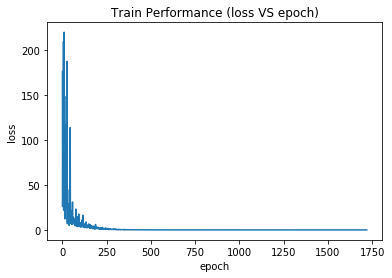

In [11]:
#plt.xlim(0,500)
plt.plot(epoch_list,lost_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train Performance (loss VS epoch)')

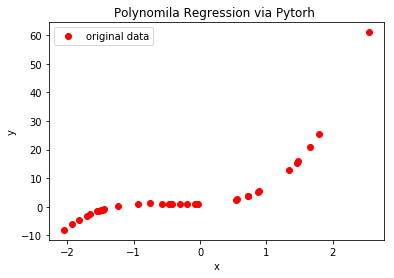

In [12]:
model.eval()
predict = model(batch_x)
predict = predict.data.numpy()
plt.plot(batch_x.data.numpy()[:,:1],batch_y.data.numpy()[:,:1],'ro', label='original data')
#plt.plot(batch_x.data.numpy()[:,:1],output.data.numpy(), label='fitting line')
plt.title('Polynomila Regression via Pytorh ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [13]:
# dev 